#  Anomaly/Novelty/Outlier Detection


> **Instructor's Notes**

The lecture involves concepts that are based on things student already know. They are slightly modified and used.

 Make session interactive and ask them questions wherever you feel is right

## **Introduction to Anomaly/Novelty/Outlier Detection**

**What is an Anomaly?**

- Anomaly is nothing but synonymous of an **outlier**. These terms are often interchanged, and maybe called as **Novelty** depending on the context.

**Q. What's the difference?**

- **Anomaly** means something which is not a part of the normal behaviour
- **Novelty** means something unique, or something that you haven't seen it before(novel)

> **Instructor Notes:**
 Ask them which all algorithms they have studied till now, can be used for outlier/novelty/anomaly detection?

## **Introducing Business Case**

- Recall your Linear regression Classes back in ML-1 where you worked on Cars-24 Dataset.

- Now, you're aware that automobile industry is making a tranisition from **fuel (pertrol/diesel) based cars** to **Electric Cars (EVs)** because of high mileage given by EVs and other environmental concerns.

- As they are new in the industry, number of EVs is significantly smaller than the fuel-based cars.

- For used cars, one of the most important features that a buyer cares about is the mileage. We extracted two features namely '**Mileage**' and '**Price**' from the revised and newer data.

- We are using only these two features because these are the two most important things that buyer really cares about when purchasing a used car. In addition, for visual purposes, 2D data is easy to visualise which can help in understanding the algorithms that we are going to study in this lecture.

- Our task is to identify any novelties/anomalies/outliers that might be present in the data. Let's have a look at the data.

In [ ]:
# -> 5.1.0
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.0
    Uninstalling gdown-4.6.0:
      Successfully uninstalled gdown-4.6.0


In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 59.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [ ]:
df.shape

(908, 2)

In [ ]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


- Notice, something strange here?

- Look at the **Min** and **Max** values for both the features.

- Lets plot this data on a scatterplot.

Text(0, 0.5, 'Price')

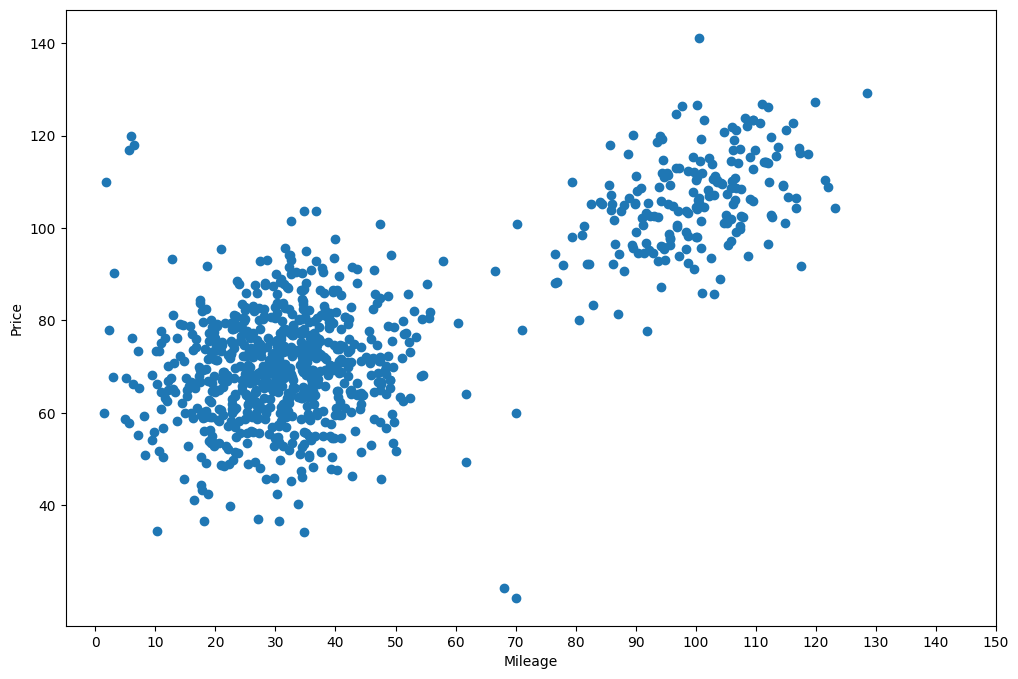

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

## IQR
> Already studied in probability distribution lec-1

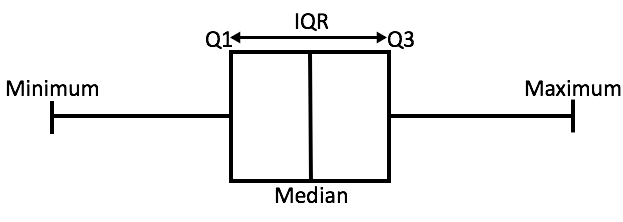

IQR = Q3 - Q1

To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)

This technique is applied for individual features, not for whole observations

## **IQR Code Implementation**

In [ ]:
import numpy as np
def outlier_indices(x):
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outlier_index = np.where((x < lower_bound) | (x > upper_bound))
    return outlier_index

In [ ]:
outlier_indices(df['Mileage'])

(array([700, 701, 702, 703, 704, 706, 707, 708, 709, 710, 711, 712, 713,
        714, 715, 717, 718, 719, 720, 721, 722, 724, 725, 726, 727, 728,
        729, 730, 731, 732, 733, 735, 736, 739, 740, 741, 742, 743, 744,
        745, 746, 747, 748, 750, 752, 753, 755, 756, 757, 758, 759, 760,
        762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774,
        776, 777, 778, 779, 781, 783, 784, 786, 787, 788, 789, 790, 791,
        793, 794, 796, 797, 798, 800, 801, 802, 803, 804, 806, 808, 809,
        810, 811, 812, 813, 814, 815, 816, 817, 818, 820, 821, 822, 823,
        824, 825, 826, 827, 828, 829, 830, 831, 833, 834, 835, 836, 837,
        838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 849, 850, 851,
        852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
        865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 876, 877, 879,
        880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892,
        893, 894, 895, 896, 897, 898, 899]),)

extracting the outlier values

In [ ]:
df['Mileage'].iloc[outlier_indices(df['Mileage'])[0]]

700     94.348497
701     95.309372
702     89.449101
703     96.786271
704    106.158299
          ...    
895    128.604249
896     95.732432
897     93.555499
898     94.782138
899    103.317397
Name: Mileage, Length: 176, dtype: float64

we can repeat the same for othe column

In [ ]:
df['Price'].iloc[outlier_indices(df['Price'])[0]]

713    126.304762
747    126.448422
791    141.201890
821    127.363812
879    126.947835
885    126.613519
895    129.275592
904     20.000000
905     22.000000
Name: Price, dtype: float64

## **Elliptical Envelope**

- Elliptical Envelope follows a strong assumption that your data follows gaussian distribution.

- It should follow uni-model gaussian distribution and not with multiple peaks.

<center><img src="https://drive.google.com/uc?id=1z4nAp1G7BuUrNWdDEOs_kjy1MS0upBau" width="700" height="250"> </center>

####**Q**. So how does it work?

- It is intuitively built on the premise that data comes from a known distribution. If we draw an ellipse around the gaussian distribution of data, anything that lies outside the ellipse will be considered an outlier.

- It tries a lot of hit and trial and there is paramater which is called **contamination**.
- If you set contamination = 0.1, then there will 10% of outliers outside ellipes.

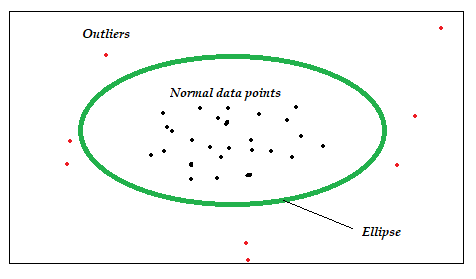

the Elliptic Envelope algorithm fits a robust covariance estimate to the data objects by fitting an ellipse to the central data points. Given the covariance estimate and the center of the distribution this method draws an ellipse and classifies each data point as inlier if it is placed inside the envelope or as outlier if it is placed outside the envelope

- Given some data and it follows normal distribution in high dimensional space and it is a unimodal distribution, It will robustly estimate(without being impacted by outlier) the parameteers for that ellipse and then classify point as outliers or anomaly.

- For robustly estimating the parameters for creating the ellipse, scikit learn implimentation uses an algorithm called Fast MCD (Fast Minimum Covariance distribution) which is a linear algebera based technique to calculate the mean variance and covariance matrix.

> We need not go in the depth of how those parameters are calculated becuase they require a high level of maths and understanding of algebra which is not required for working with this algorithm

#### **sklearn walkthrough**

Scikit-learn implements **EllipticEnvelope** as a part of **covariance** module. Let walkthorugh the parameters that are important
<img src='https://drive.google.com/uc?id=1Gl3Ce6Q4oqdph5XhpVTX5EQeml9uIcv3'>

**1. assume_centered:** It is for assuming that that the data is centered at $0$.

By default, it is set as $False$. If set to $True$, it will just estimate the covariance matrix.


**2. support_fraction:** It tells how many points to use to estimate the parameters

**3. contamination:** It says what  percentage of our data do we think are  outliers.

It takes values from $0$ to $0.5$, where $0.5$ represents that $50$% of our data is noisy. Default assumption value is $0.1$ ~ $10$%

<img src='https://drive.google.com/uc?id=1NmQ8UOi-blHFpYAzUvUSpfuesRzyxj3I'>

#### **Sklearn implementation**

In [ ]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

In [ ]:
elpenv = EllipticEnvelope(contamination=0.025,  # setting our contamination parameter
                          random_state=1)

In [ ]:
pred = elpenv.fit_predict(df) # saving predictions in a variable pred

In [ ]:
df['is_outlier_ee'] = pred

In [ ]:
df[df['is_outlier_ee']==-1] #outliers

,Mileage,Price,is_outlier_ee
713,112.123218,126.304762,-1
718,117.382482,116.340676,-1
741,116.756890,104.381785,-1
742,121.593860,110.415852,-1
753,122.140478,108.911361,-1
776,117.253947,117.246955,-1
786,113.809389,117.468742,-1
791,100.495158,141.201890,-1
802,117.648921,91.709090,-1
810,116.175878,122.733600,-1


Plotting the results of Elliptic Envelope

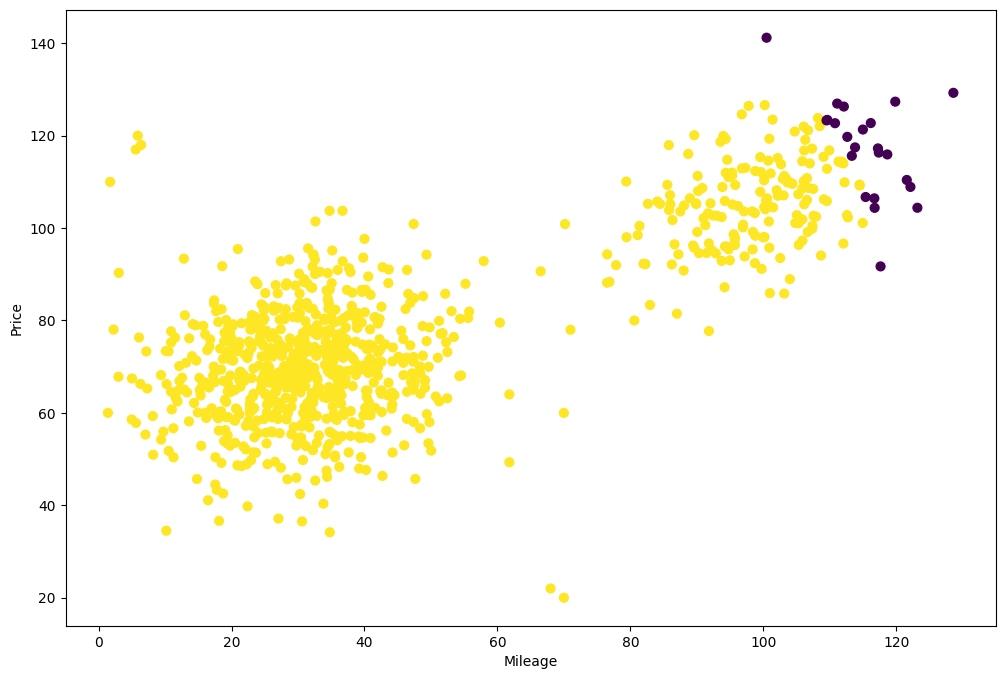

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### **Disadvantages**

You might have find the concept of elliptical envelope quite straightforward, but there are limitations.

  - It cannot be used non-unimodal data
  - It is specifically for multivariate gaussians

If the data fails to meet the assumptions of unimodal and multivariate gaussian, the whole things crashes.

May break or not perform well in high-dimensional settings. In particular, one will always take care to work with n_samples > n_features** 2

Next up is Isolation Forest. Let's see what that method has to offer!


**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18431/
***

## **Isolation Forest**

- Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

- IsolationForests were built based on the fact that anomalies are the data points that are “**few and different**”.

- Let's say I create a decision tree in the img given below and marked some nodes as a,b,c,d,e.
####Q. So now what do you think which of them will be an outlier?
  - Most likely **a** will be an outlier.

<center><img src="https://drive.google.com/uc?id=1_asXE2wJ6BKpiGNn2OpTTrfjatqY87gA" width="600" height="350"> </center>



####Still confused why a is outlier , understand it with an example of Elon Musk, let's see how?
- With decision tree having condition greater 250 B wealth.
- So on right we have Elon Musk there but on left if you were to reach yourself you have to have many if-else conditions.

<center><img src="https://drive.google.com/uc?id=1ifvcoOnFROea0V9bzBTGEO7ombjuszY_" width="800" height="500"> </center>


#### What do interpret from above?
- Something which comes up fast and early could probably be a outlier.



These are the stpes involved in Isolation Forest:
- Build many trees like random forests
- For each tree:
  - Randomly pick a feature
  - Randomly threshold that feature
  - Build each tree until the leaf consists of only one datapoint

Isolation Forests are also known as **iForests**

**Q. What is the whole idea behing Isolation Forest?**

So, to sum it up, the idea behind Isolation forest is,
  - On an average **outliers** have **lower depth** in the random trees
  - On an average, **inliers** have **more depth** in the random trees

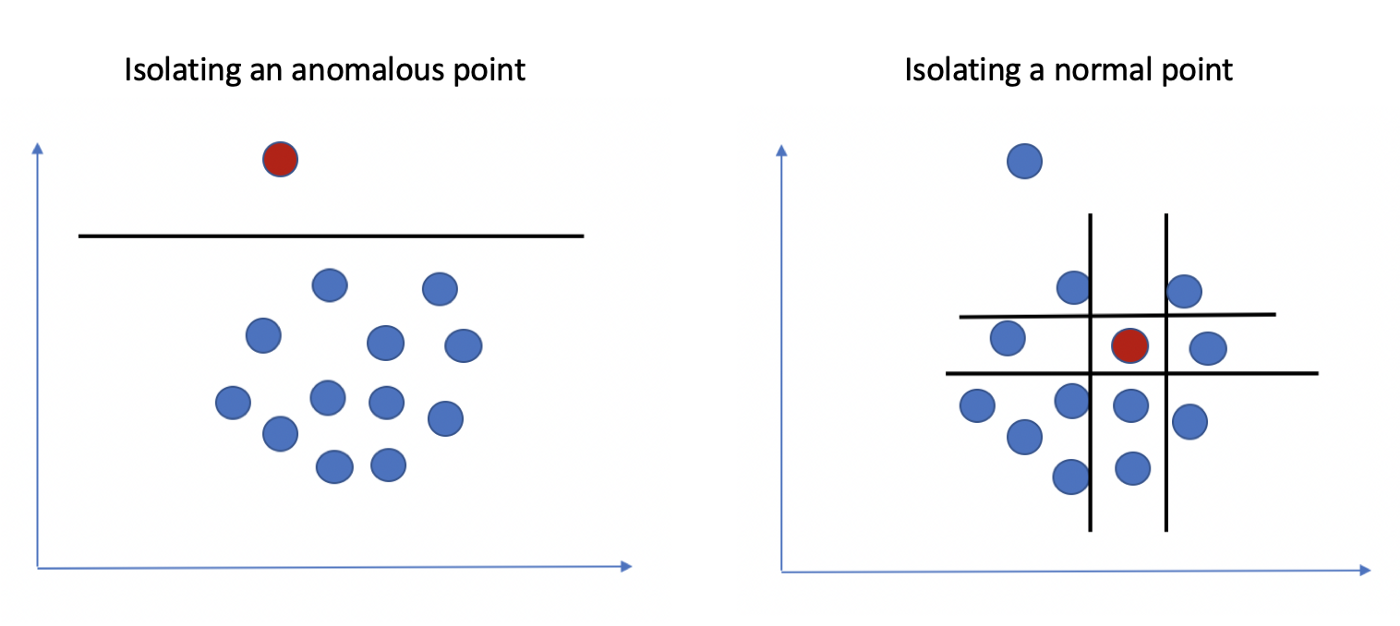


- **Sub-sampling**: since iForest does not need to isolate all of normal instances, it can frequently ignore the big majority of the training sample. As a consequence, iForest works very well when the sampling size is kept small

### Another example with a dataset

- Let's create a data set in the image given below.

**Q**. From datapoints we plotted below which do you think is a outlier?

- Obviously **G** datapoint

<center><img src="https://drive.google.com/uc?id=1moj-tAneqHVyOFt1qHsLQc-G0ZnkPt6Q" width="800" height="400"> </center>

These are the stpes involved in Isolation Forest:
- Build many trees like random forests
- For each tree:
  - Randomly pick a feature
  - Randomly threshold that feature
  - Build each tree until the leaf consists of only one datapoint

Now let's see it by creating a decision tree

- We can easily observe the fact that G comes up with depth 1 of DT.

Isolation Forests are also known as **iForests**

- Now for data point G we would calulate the avg depth across the 100 DT that we built.
- It may happen that in other trees G comes out to be at depth 2 or 3, but there is unlikely chance that it will go deeper in the DT.

  - AVG = (1 + 2 + 1 + 1 + 3 + 2 + 1 + .....+ 2) 100 ~ 1.25

- Similarly if we calculate for point **C**, **AVG** come out to be **3.56**

- So the important take is that whichever point has **lowest avg depth** will be our **outlier**.

<center><img src="https://drive.google.com/uc?id=137Lof_B4H3vME_OxGV1Fa7jKm3NyqYJU" width="800" height="450"> </center>


- But when it comes to code implemenation, it will give some anamoly score for each datapoint, so lower score means, that is a outlier.

#### **Quiz-3**
```
In isolation forests, on the basis of what do we select a threshold for a split?

a. Gini Impurity
b. Entropy
c. Information Gain
d. Random splits
```
**Answer:**

d. Random splits

#### **Sklearn Implementation**

We can implement Isolation Forest with the help of sklearn's **IsolationForest** method present in **ensemble** module.

Lets see some of the parameters that **IsolationForest** expects

**1. n_estimators:** It represents the number of base learners. By default, the value is set equal to $100$

**2. max_sample:** It is the number of samples to extract from the dataset to build the trees(row sampling). By default the value is set to **auto** and sklearn picks reasonably a good figure for iForests

**3. contamination:** It tells the proportion of outliers in the data. The range is between $[0, 0.5]$

**4. max_features:** It is the number of features to extract from the dataset to build the trees(column sampling).

In [ ]:
from sklearn.ensemble import IsolationForest

Passing datapoints to predict whether it is an outlier or an inlier. Return $-1$ if outlier, or else it returns $1$

> **we are using the same data as explained in the diagrams above**

In [ ]:
df= df.drop('is_outlier_ee', axis=1)

In [ ]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.03).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


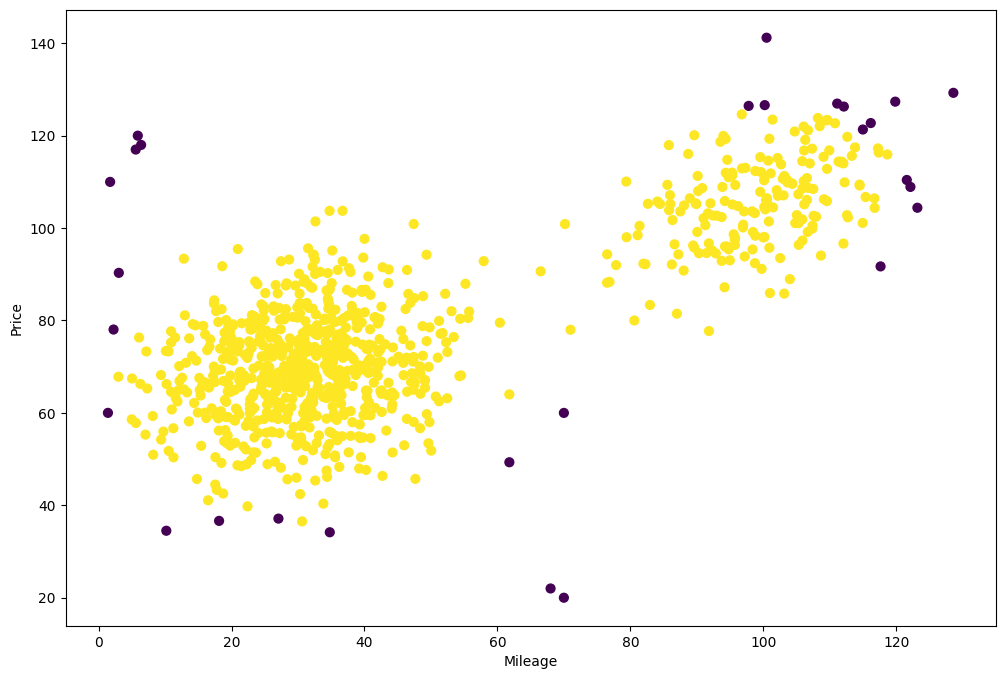

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Isolation Forests are heavily used when dataset size is very large because algorithms like Elliptical Envelope are typically harder and they have very strong assumptions


#### **Major Disadvantage of Isolation Forest**

**One of the major limitation of iForests is that they are biased towards axis parallel splits.**

iForests makes splits and these splits are always parallel to either of the axis.

Because of this, the boundary will not be smoothed.
  
  - In the diagram given below, the different shades of red-yelow represents the likelihood of a point to be an outlier. Darker the color, it is more likely that the point in that region will be an outlier

  - We've trained iForest model using training data
  




Now imagine two points $P_{1}$ and $P_{2}$.  as shown in the diagram given below.

- Both the points are almost equidistant from nearest cluster. $P_{2}$ is on the axis and point $P_{1}$ is off axis.

- Because the model is biased towards axis, it will classify point $x_{1}$ as an inlier and $x_{2}$ as an outlier


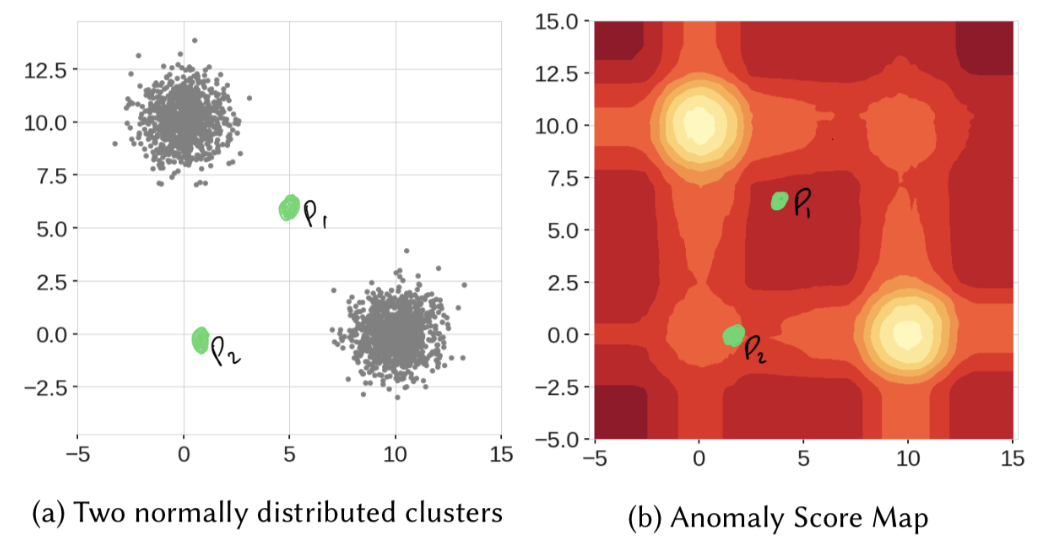

**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18518/
***

## **Local Outlier Factor (LOF)**

On a higher level, LOF is based on two ideas: **KNN** and **density**

The core idea behind LOF is to compare the density of a point with its neighbors' density

If the density of a point is less than the density of its $k$ neighbors, we flag that point as an outlier

Lets understand it more intuitively.



#### **Intuition**

Imagine a bunch of datapoints as shown below


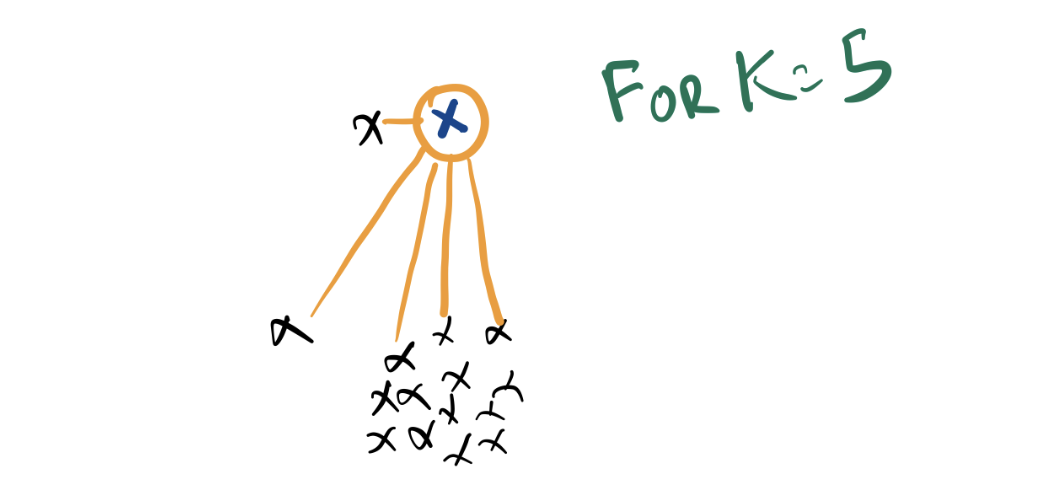


We compute the density of a point based on average distance.
  - if average distane between a point and its $k$ nearest neighbors is large, it is more likely that the point will be an outlier
  - also, larger the value of $k$, more confident are the results

Moving forward, lets get familiar with some concepts to understand the working of LOFs

##### 1(a) **K-distance**

- We define K-distance of a point $A$ as the distance of point $A$ to its **$k^{th}$ nearest neighbor**

- In general, larger the value of k-distance is, farther away the points is from other datapoints

With this k defined, we can introduce the k-distance which is the distance of a point to its kth neighbor. If k was 2, the k-distance would be the distance of a point to the second closest point.

##### 1(b) **Set: $N_{k}(A)$**

- It is a set of k-nearest neighbors of point $A$

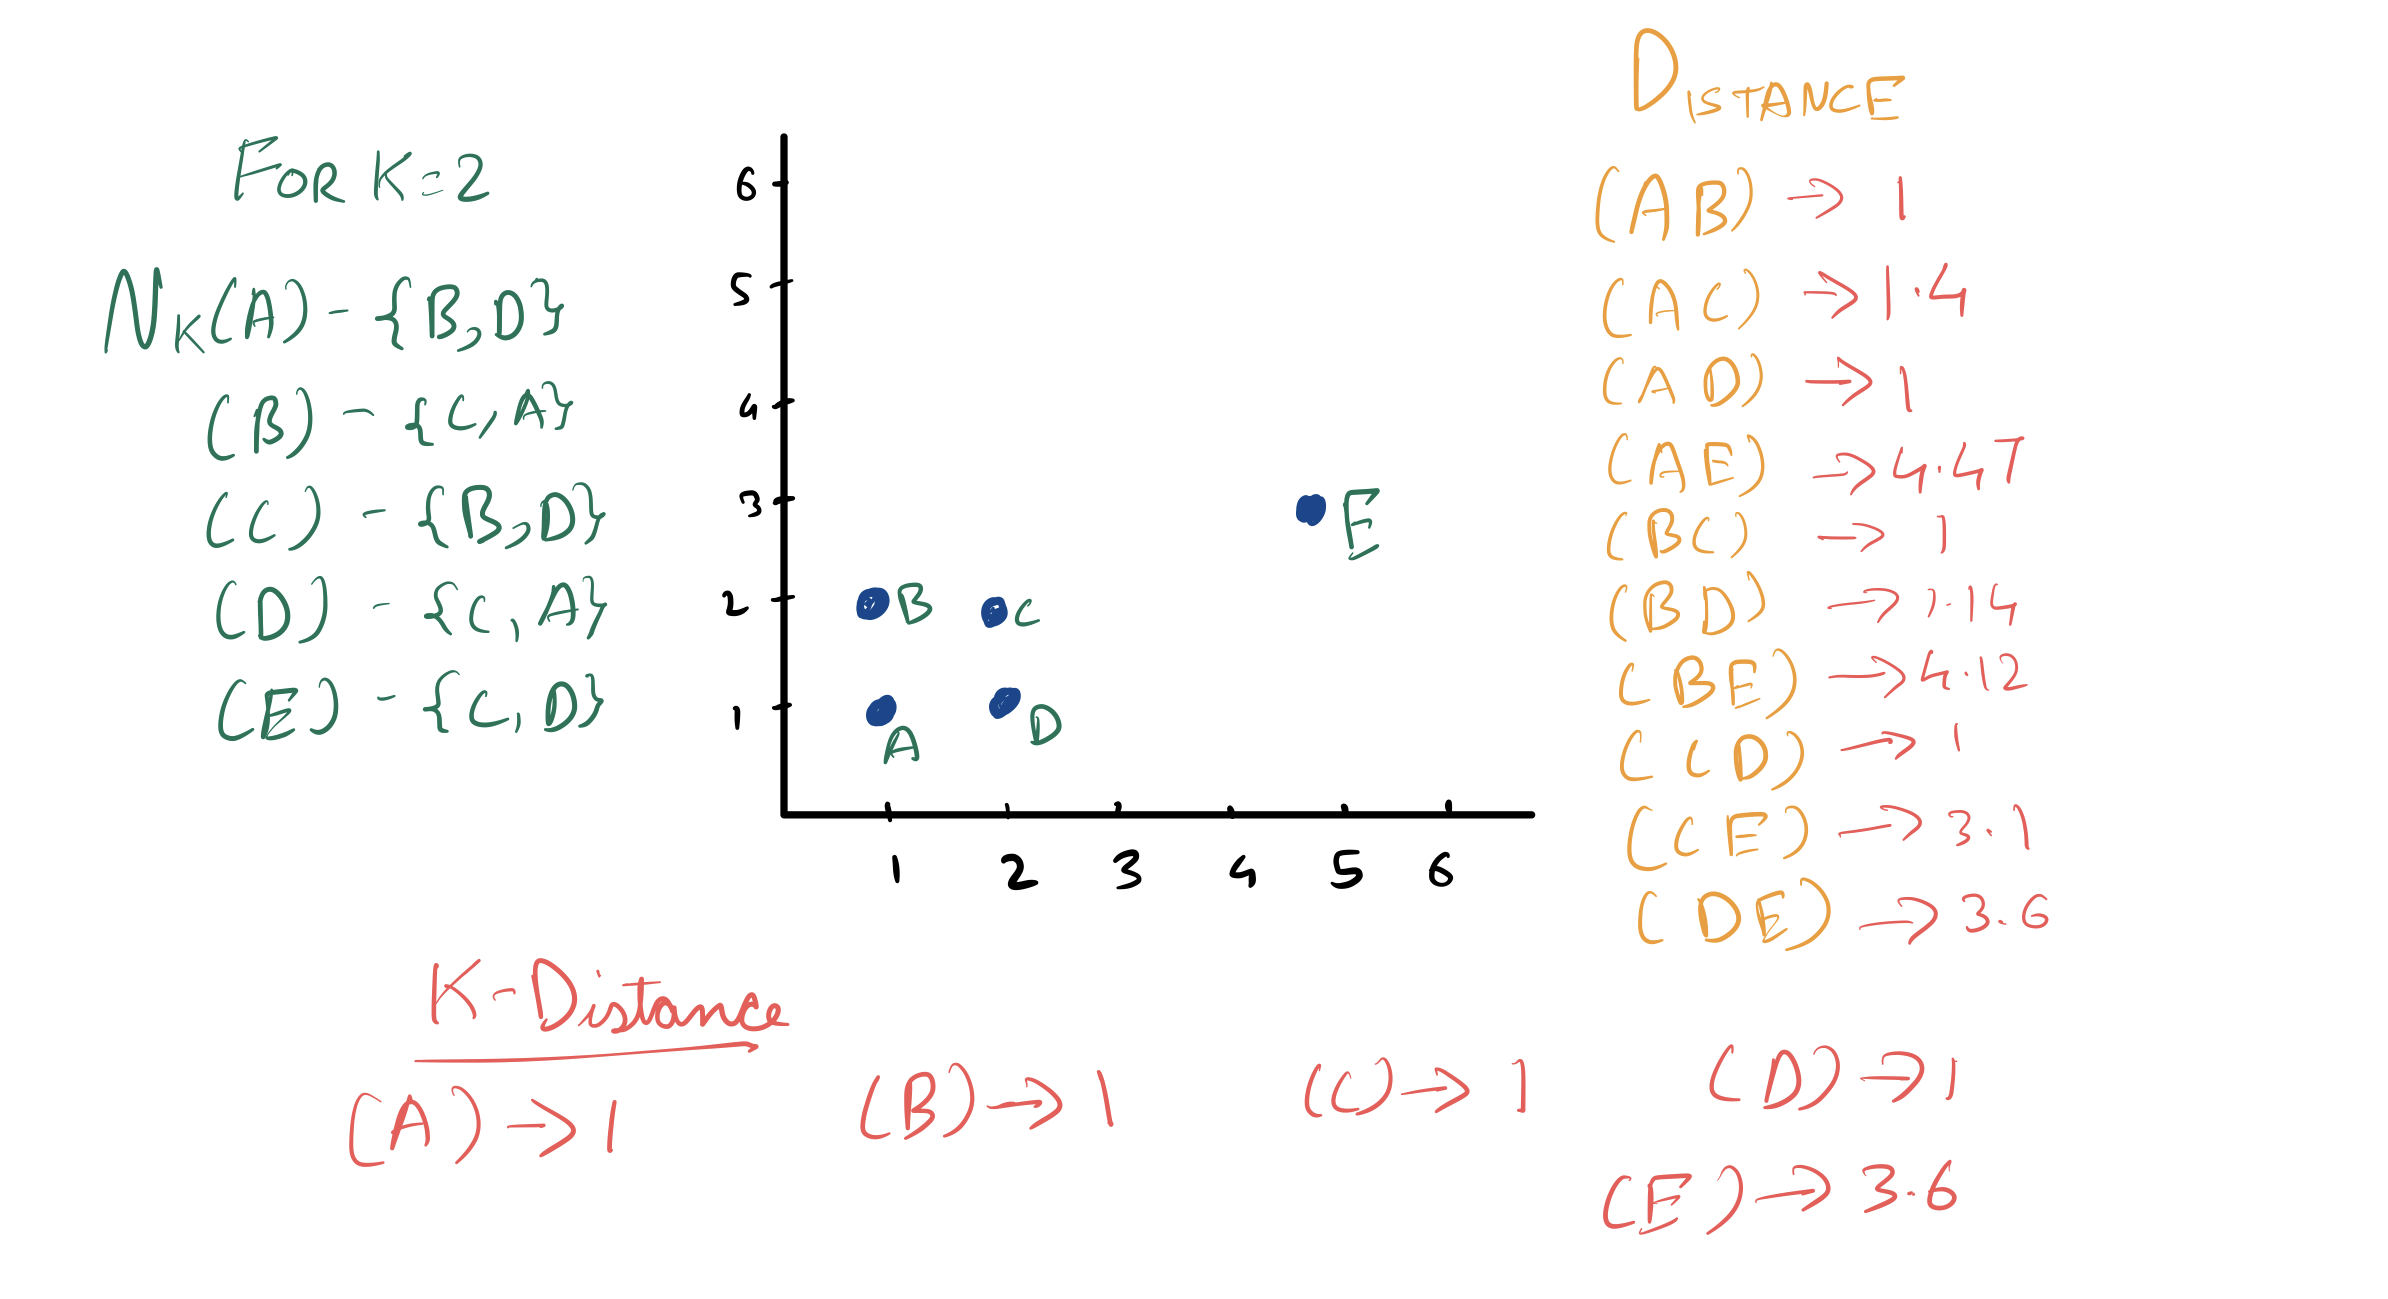

##### **2. Reachability distance**

- From point $A$ to point $B$, we define reachability distance as **maximum** of the  distance from point $A$ to point $B$ and the maximum k-distance of point $B$





The k-distance is now used to calculate the reachability distance. This distance measure is simply the maximum of the distance of two points and the k-distance of the second point.

 **reach-dist(a,b) = max{k-distance(b), dist(a,b)}**

Basically, if point a is within the k neighbors of point b, the reach-dist(a,b) will be the k-distance of b. Otherwise, it will be the real distance of a and b. This is just a “smoothing factor”.

- There is a possibilty that some neighbors might be close(condition 1) and some neighbors might be very far away(condition 2)

- In this case, there is a neighbor of point $B$ whose k-distance $>$ the distance between point $A$ and $B$, and hence, it is considered as its reachability distance

- In this case, point $A$ may or may not be a k-nearest neighbor of point $B$

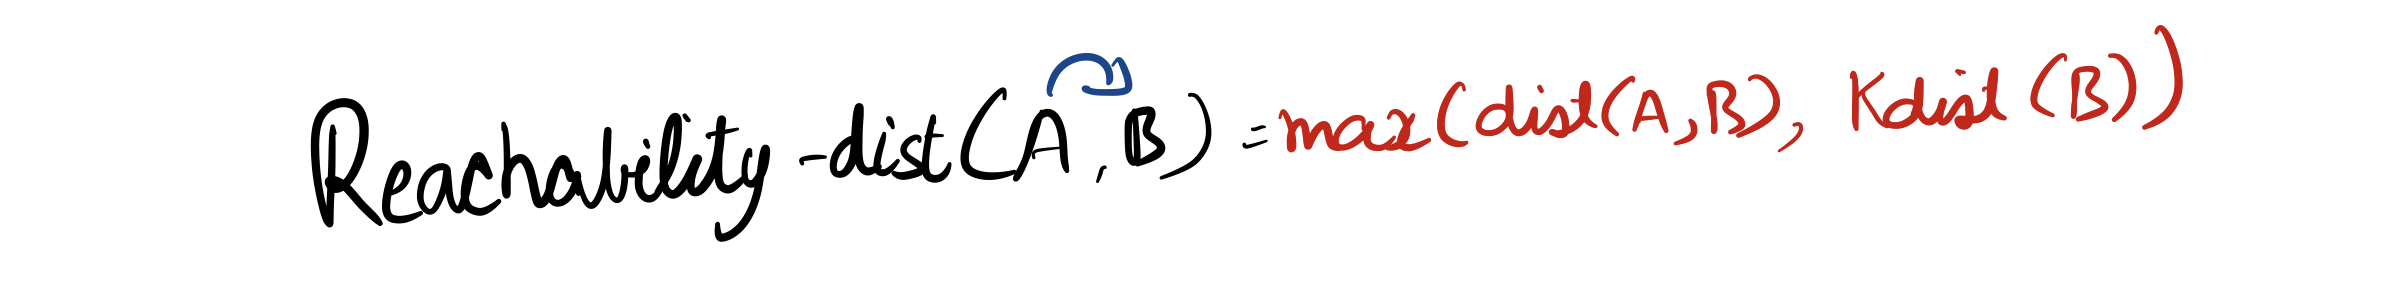

#### **Local reachability density**

LRD is the estimated distance at which a point can be found by its neighbors

- To get the local reachability density (LRD) for a point a, we will first calculate the reachability distance of a to all its k nearest neighbors and take the average of that number. The lrd is then simply the inverse of that average.

**LRD(a) = 1/(sum(reach-dist(a,n))/k)**

- By intuition the local reachability density tells how far we have to travel from our point to reach the next point or cluster of points. The lower it is, the less dense it is, the longer we have to travel.

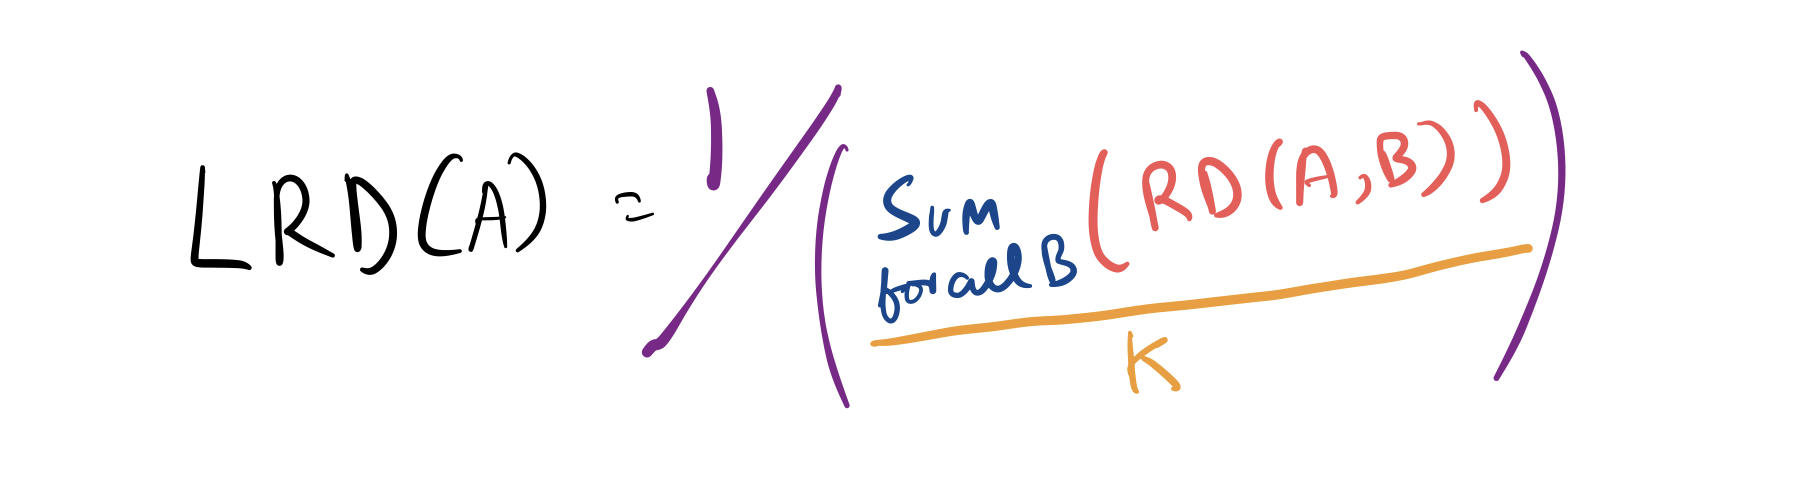

#### **LOF**

- The LOF is basically the average ratio of the lrds of the neighbors of a to the lrd of a. If the ratio is greater than 1, the density of point a is on average smaller than the density of its neighbors and, thus, from point a, we have to travel longer distances to get to the next point or cluster of points than from a’s neighbors to their next neighbors.

#### **Putting it all together**

* 1) The k-nearest-neighbors have to be found for each data point. In case of distance tie of the k_th neighbor, more than k neighbors are used.

* 2) Using these k-nearest-neighbors N_k, the local density for a data point is estimated by computing the local reachability density (LRD)

* 3) Finally, the LOF score is computed by comparing the LRD of a record with the LRD’s of its k-neighbors.


#### **Interpretation of LOF**

Now that we know how to compute LOF for a given point, questions is how to interpret it? Let's see.

- If $LOF(A) = 1$, then we can say that the point $A$ has same density(lrd) as its $k$ nearest neighbors

- If $LOF(A) > 1$, then the $k$ neighbors of point $A$ have higher denstiy than point $A$.
  - That does not mean point $A$ is an outlier. It may or may not be.
  - But if $LOF(A) >> 1$, then point $A$ is definitely an outlier.

- If $LOF(A) < 1$, then point $A$ has more denstiy than its $k$ nearest neighbors.

We compute the LOF for each point, and based on that extract the outliers



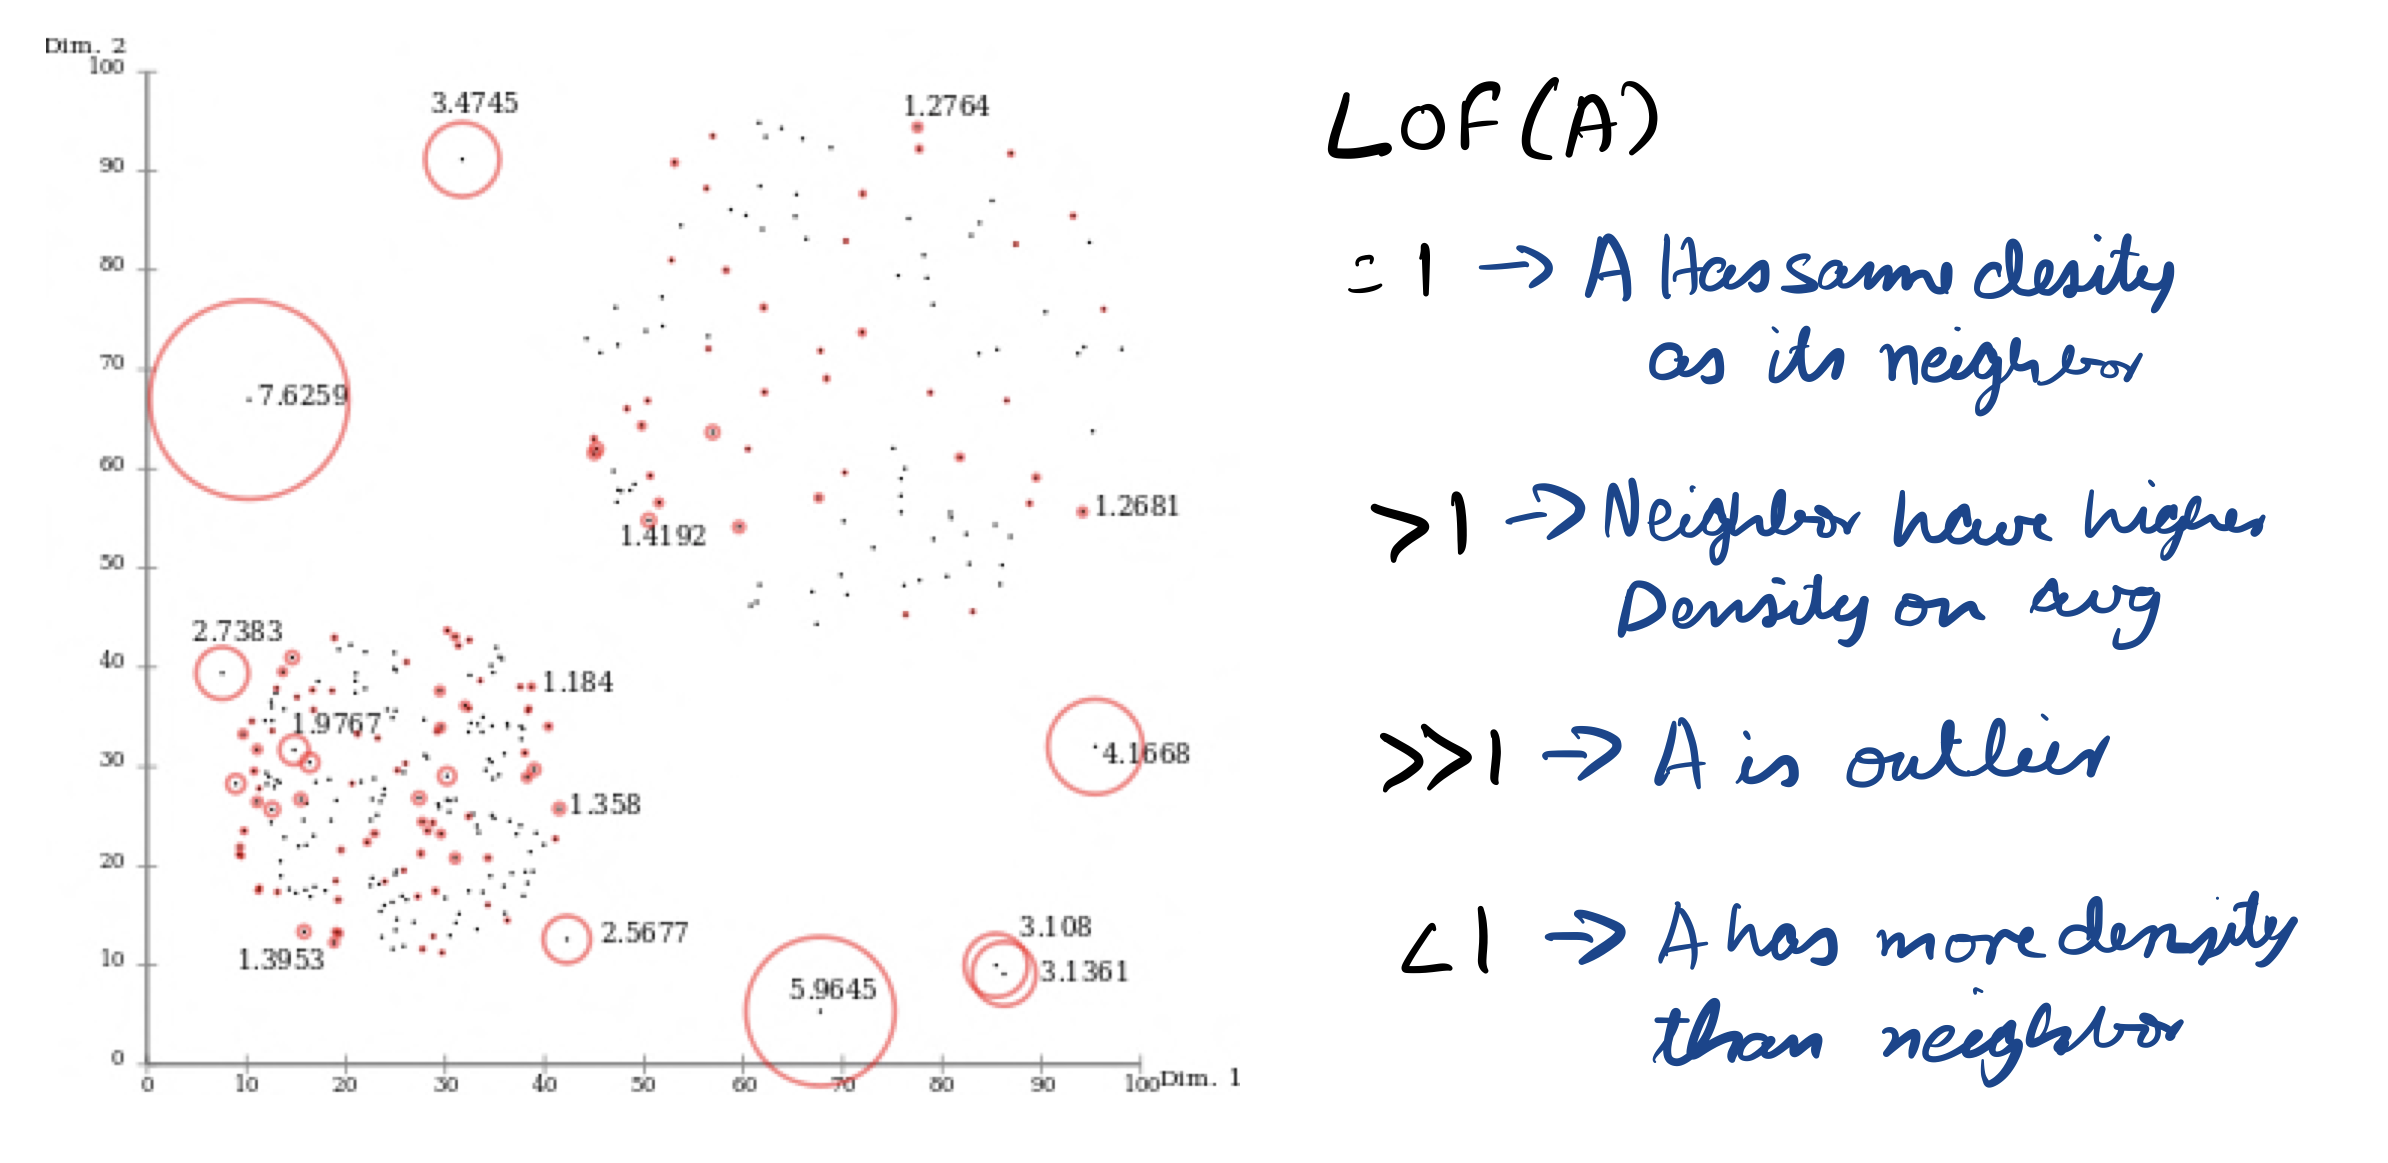


You can see that extreme outliers have very high LOF values, while the border points of a dense region has slightly higher values than 1

We dont mark these border points as outliers.

There is a point with LOF value = 2.7383. We mark it as an outlier because it is certainly a lot higher 1.

These is one limitation of LOFs. We don't know what threshold to use and it often depends on the use case and is decided by the domain expert

#### **Quiz-5**
```
If LOF of two points P1 and P2 are 1.045 and 3.356, then in average which point will be marked as an outlier?

a. P1
b. P2
c. Both of them
d. Neither of them
```
**Answer:**

b. P2

#### Implimentation of LOF

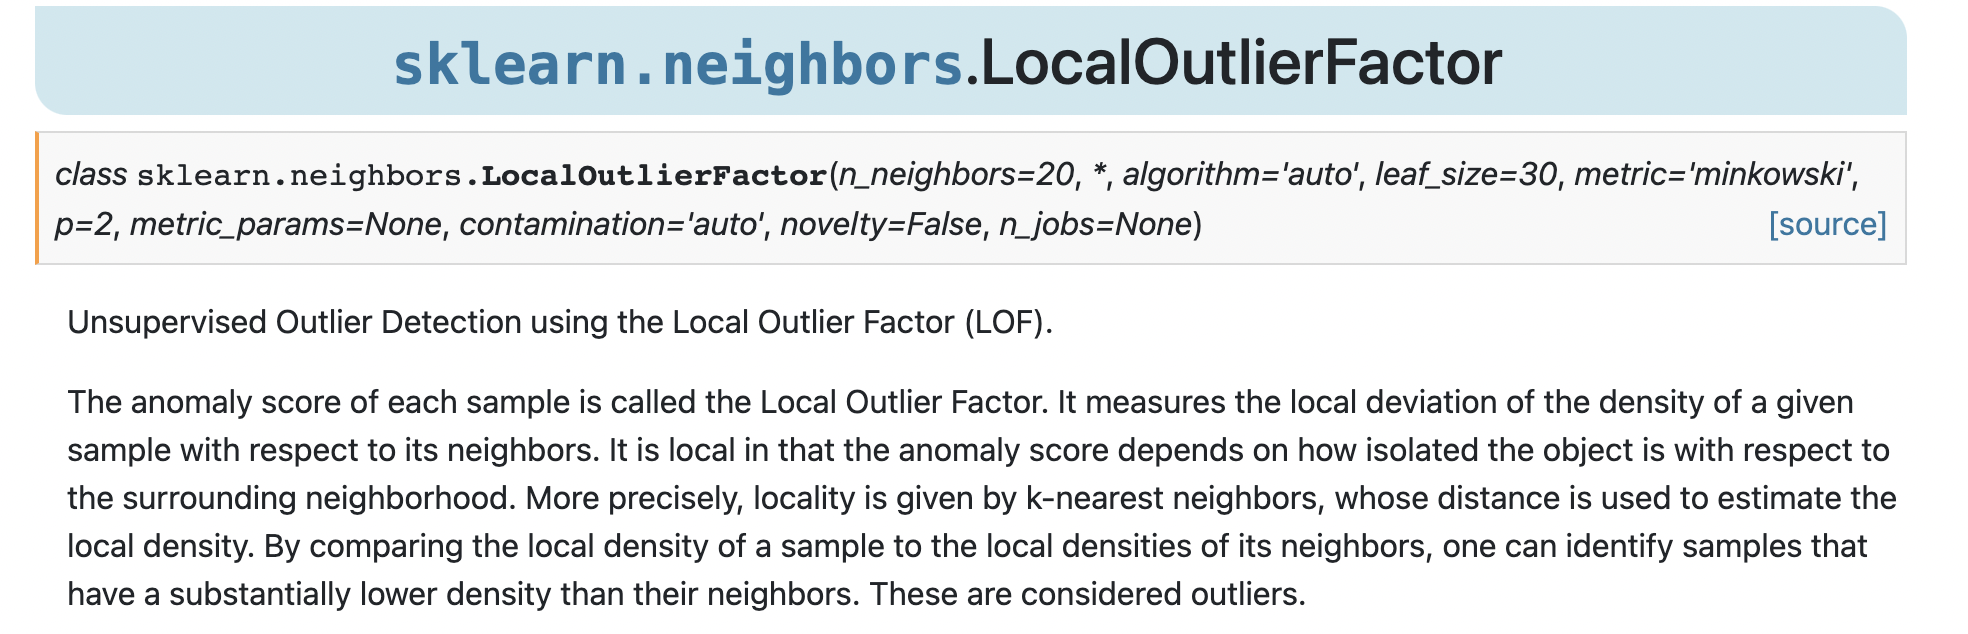

In [ ]:
df=df.drop('is_outlier_if',axis=1)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# using same data that we used in Elliptical Envelope -----> df

outlier_scores = LocalOutlierFactor(n_neighbors=20, contamination=0.025).fit_predict(df)

In [ ]:
df['is_outlier_lof'] = outlier_scores

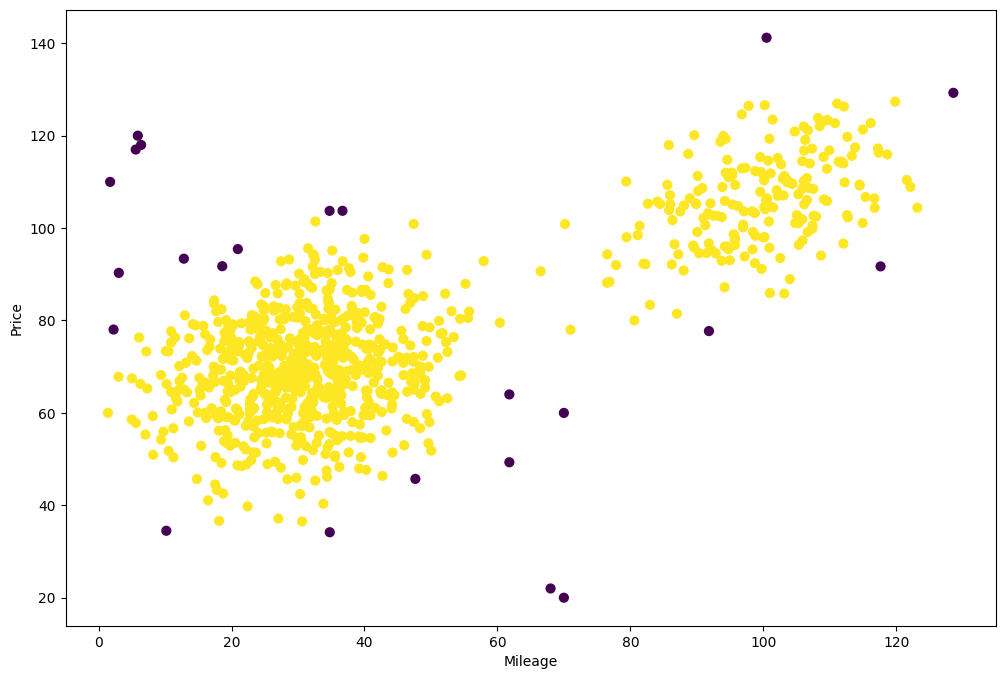

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

**Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods.When novelty is set to True it works as Novelty detection with Local Outlier Factor**

#### **Disadvantages of LOF**

1. Finding optimal K
2. Finding threshold.
  - If LOF(A) >> 1, what is the threshold??
3. Cannot handle high dimensional data efficiently
4. High Time Complexity



**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18439/
- https://www.scaler.com/hire/test/problem/24312/
- https://www.scaler.com/hire/test/problem/24307/
***

## Comparision of Methods

We'll now see a brief comparision of all these methods.

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

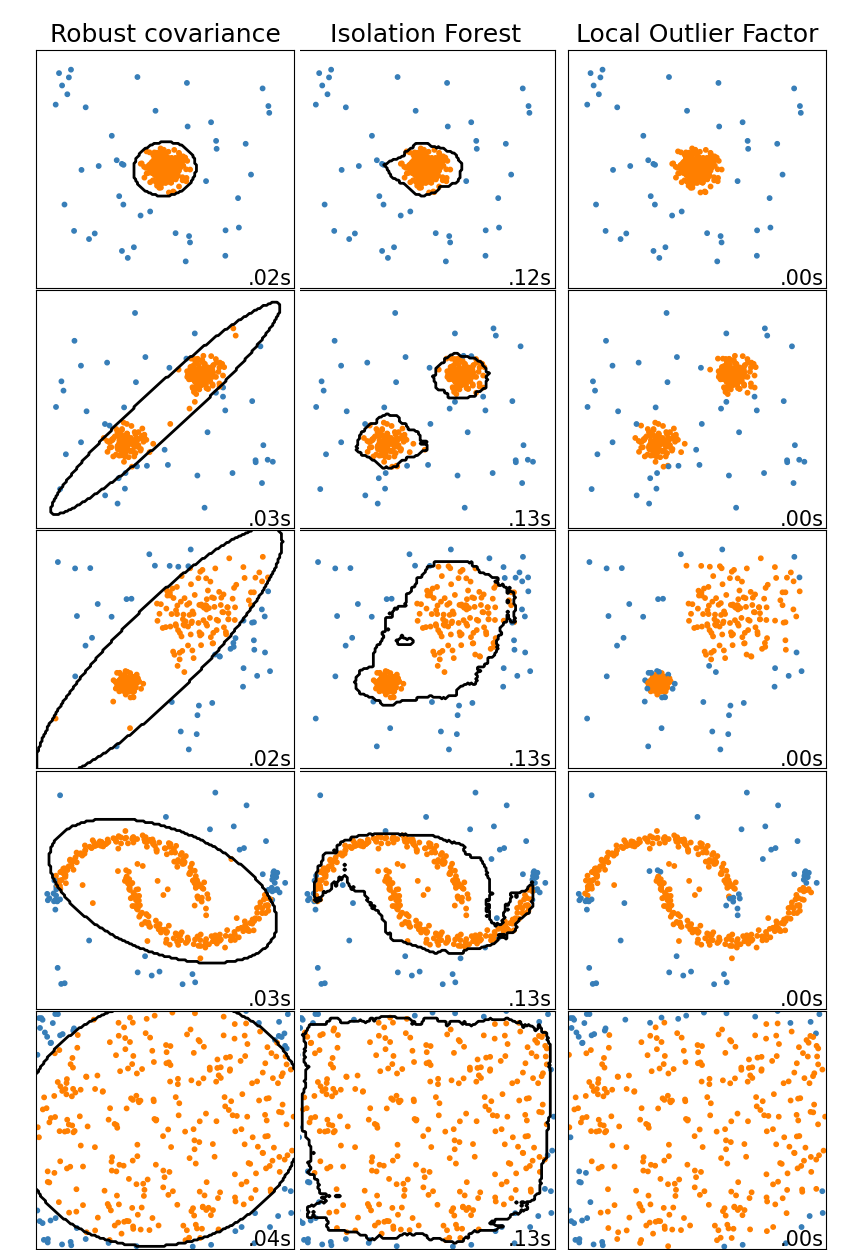

**Case 1:** When data is dense at a certain region and sparse around it

- From row 1, We can see that all the methods that we studied performs relatively well when the data is dense at certain region and sparse around it



**Case 2:** When there are multiple dense regions in the data

- Here also, we can see that each methods performs relatively good.

- In elliptical enevlope(robust covariance) method, you can see the elliptical shapes being formed as a decision boundary. This can include some noise points if present inside the ellipse

**Case 3:** When one cluster is highly dense and other cluster is a little spread out

- Same problem arises with the elliptical envelope method as we saw in the previous case

- Other methods perform quite well and similar.

**Case 4:** When data has two archs

- In this case, you can see that the points in the outer parts of the archs are marked as outliers by all the methods, although they are a part of the archs

**Case 5:** When data is randomly spread

- All the algorithms marks the extreme points at all the four vertices as an outliers

Isolation Forests and LOF, both worked relatively well compared to other methods for all the cases, which explains why they are used oftenly in the industry

***
***